# Lecture 10 - NumPy
ITHS/AI22 | 2022-09-19

---

In [9]:
import numpy as np
numbers_list = [1,2,3]

numbers_list = numbers_list * 2

numbers_list

'''
Flera typer i samma lista. Varje typ är ett objekt. En etta innehåller mer än en etta, den har också
en attribut som säger att den ÄR en int. "asdf" 'ÄR en string, True ÄR en bool.

The list 'knows' what data type it is - it's dynamic. Which slows down the
program. Static languages are often faster

'''
mixed_list = [1, "string", True, 2.4, [1.2222,2,3], numbers_list]

print(mixed_list)

[1, 'string', True, 2.4, [1.2222, 2, 3], [1, 2, 3, 1, 2, 3]]


In numpy we have statical types. Numpy is used in scientific computing and is inspired by matlab.

Numpy is much faster, pushes the loops to compilation layer, where the computation occurs in C.

---

## Performance test 
Using different methods to throw a dice (1d6) 1 million times.


In [51]:
%%timeit # the magic function, medelvärde + standardavvikelse
import random as rnd

number_dices = 1_000_000 #readability (must be int for loops)

many_dices = []

for dice in range (number_dices):
    many_dices.append(rnd.randint(1,6))

many_dices

1.12 s ± 51.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%%timeit
import random as rnd
number_dices = 1_000_000 #readability (must be int for loops)

many_dices = [rnd.randint(1,6) for _ in range (number_dices)]

1.05 s ± 5.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%%timeit
#random randint: sista tal exclusive
#numpy randint: sista tal inclusive

number_dices = 1_000_00

many_dices = np.random.randint(1,7, number_dices)

1.09 ms ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


![](../Images/L10_numpy-fast_banner.png)
## NumPy is written in C, and executed very quickly. By comparison, Python is a dynamic language that is interpreted by the CPython interpreter, converted to bytecode, and then executed.

--- 
## Vector array

In [25]:
vector1 = np.array([3,9,6])
print(vector1)

# array with np, elementwise operations
vector2 = vector1*2
print(vector2)

# indexing, last object from vector
print(vector1[-1])

# slice as well
print(vector2[1:])

# assign new values
vector1[1] = 411
print(vector1)

# CANNOT APPEND TO ARRAY, CANNOT MIX DATA TYPES

# sorting works of course
vector1.sort()
print(vector1)

# SUM

print(vector1.sum())

# Numpy is much faster, pushes the loops to compilation layer, where the computation occurs in C.



[3 9 6]
[ 6 18 12]
6
[18 12]
[  3 411   6]
[  3   6 411]
420


In [30]:
ones_vector = np.ones(10)

#2d array of shape (3x3 matrix)
matrix3_3 = np.ones((3,3))
print(matrix3_3)

# [row, index] 
matrix3_3[2,1] = 10
matrix3_3

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1., 10.,  1.]])

In [32]:
np.zeros((2,5)) # shapelike - takes in tuple or list, easily add more dimensions (tensors)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [35]:
print(matrix3_3.shape)

# slicing operator to get row
print(f"{matrix3_3[2,:]=}")

#slicing operator to get a column
print(f"{matrix3_3[2,:]=}")

# add 2 vectors
matrix3_3[2,:] + matrix3_3[:,1]

(3, 3)
matrix3_3[2,:]=array([ 1., 10.,  1.])
matrix3_3[2,:]=array([ 1., 10.,  1.])


array([ 2., 11., 11.])

dices = np.random.randint(1,7,100)
dices

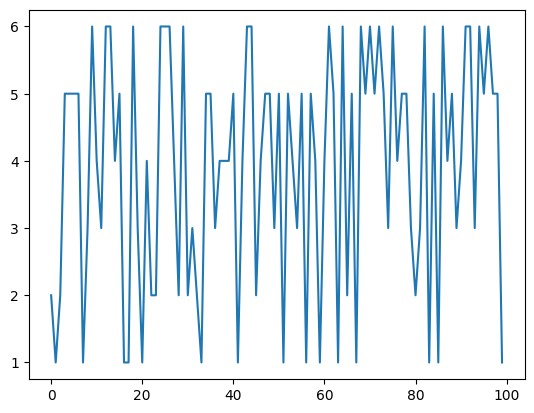

In [37]:
import matplotlib.pyplot as plt

dices = np.random.randint(1,7,100)
dices

plt.plot(dices)

In [40]:
x = np.linspace(-5,5)

x

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

[-3.         -2.79591837 -2.59183673 -2.3877551  -2.18367347 -1.97959184
 -1.7755102  -1.57142857 -1.36734694 -1.16326531 -0.95918367 -0.75510204
 -0.55102041 -0.34693878 -0.14285714  0.06122449  0.26530612  0.46938776
  0.67346939  0.87755102  1.08163265  1.28571429  1.48979592  1.69387755
  1.89795918  2.10204082  2.30612245  2.51020408  2.71428571  2.91836735
  3.12244898  3.32653061  3.53061224  3.73469388  3.93877551  4.14285714
  4.34693878  4.55102041  4.75510204  4.95918367  5.16326531  5.36734694
  5.57142857  5.7755102   5.97959184  6.18367347  6.3877551   6.59183673
  6.79591837  7.        ]


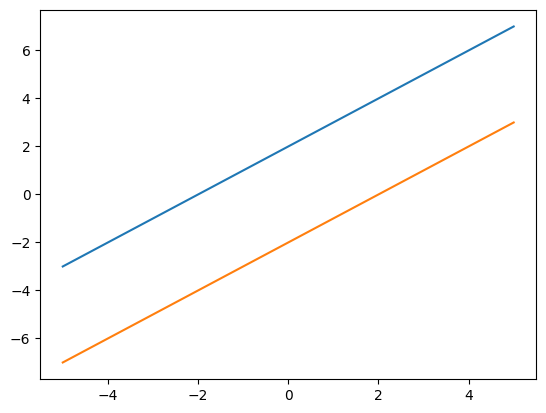

In [48]:
f = lambda x: x+2 # <=> def f(x) return x+2, anonymous function, lambda uses local variables
# 50 cordinates

g = lambda x: -2 + x

print(f(x))
plt.plot(x,f(x))
plt.plot(x,g(x))

In [45]:
np.arange(11) #array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])